# Salary Prediction Using ML

## Data Loading

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('/content/Salary Data.csv')

## Exploratory Data Analysis

In [34]:
df.shape

(375, 6)

In [35]:
df.size

2250

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [14]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [15]:
df.duplicated().sum()

50

In [16]:
df.nunique()

,0
Age,31
Gender,2
Education Level,3
Job Title,174
Years of Experience,28
Salary,36


In [17]:
df['Age'].unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53., nan])

In [18]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [19]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

In [20]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

## Data Visualization

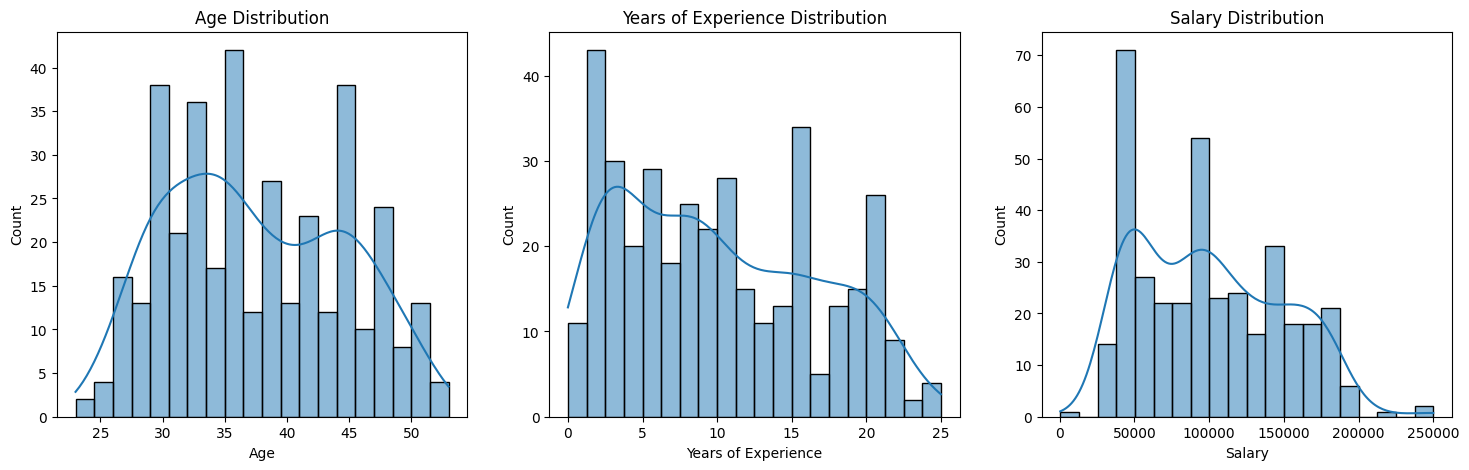

In [41]:
# Histogram for numerical features

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["Years of Experience"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Years of Experience Distribution")

sns.histplot(df["Salary"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Salary Distribution")

plt.show()

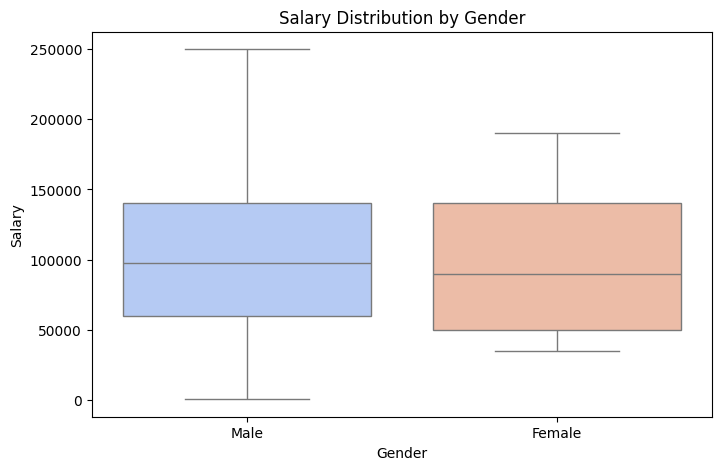

In [42]:
# Boxplot for Salary vs. Gender

plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Salary", data=df, palette="coolwarm")
plt.title("Salary Distribution by Gender")
plt.show()

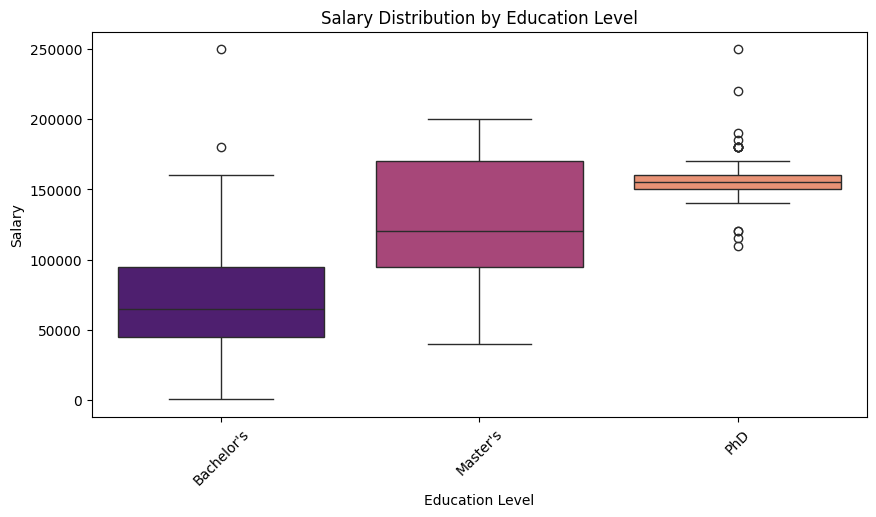

In [43]:
# Boxplot for Salary vs. Education Level

plt.figure(figsize=(10, 5))
sns.boxplot(x="Education Level", y="Salary", data=df, palette="magma")
plt.xticks(rotation=45)
plt.title("Salary Distribution by Education Level")
plt.show()

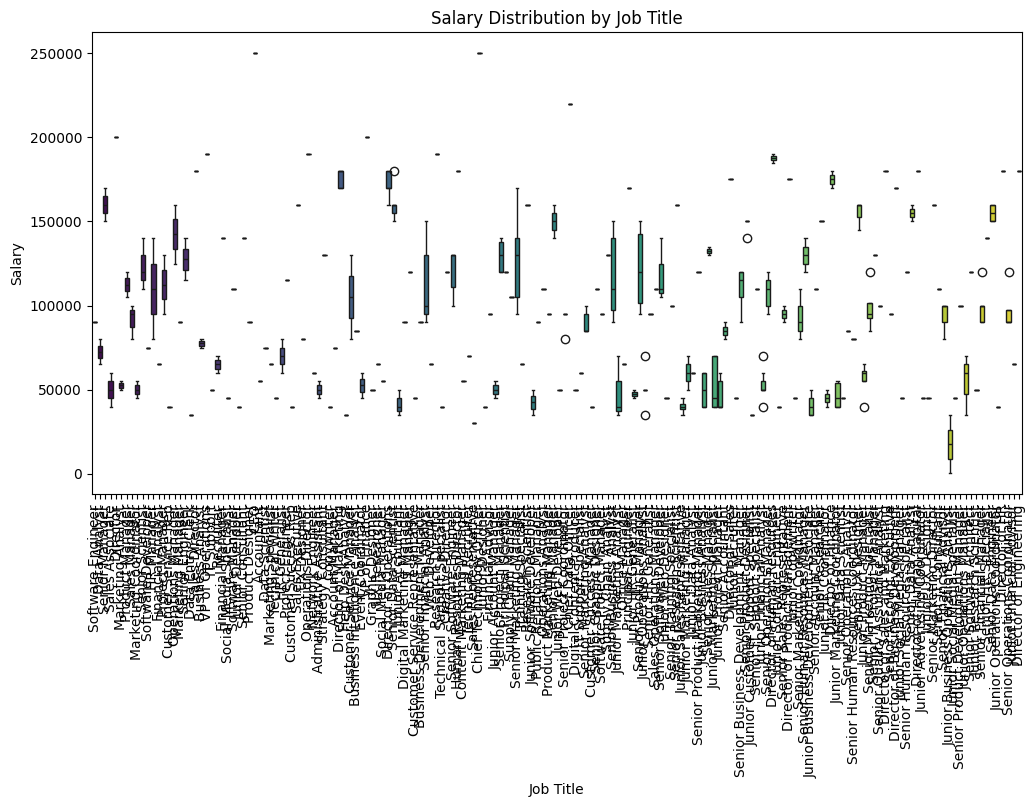

In [44]:
# Boxplot for Salary vs. Job Title

plt.figure(figsize=(12, 6))
sns.boxplot(x="Job Title", y="Salary", data=df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Salary Distribution by Job Title")
plt.show()

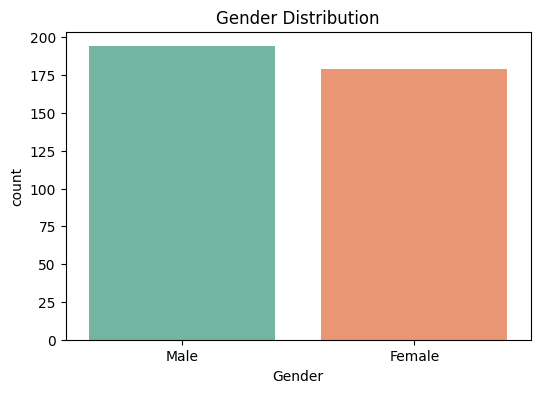

In [45]:
# Countplot for Gender distribution

plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()

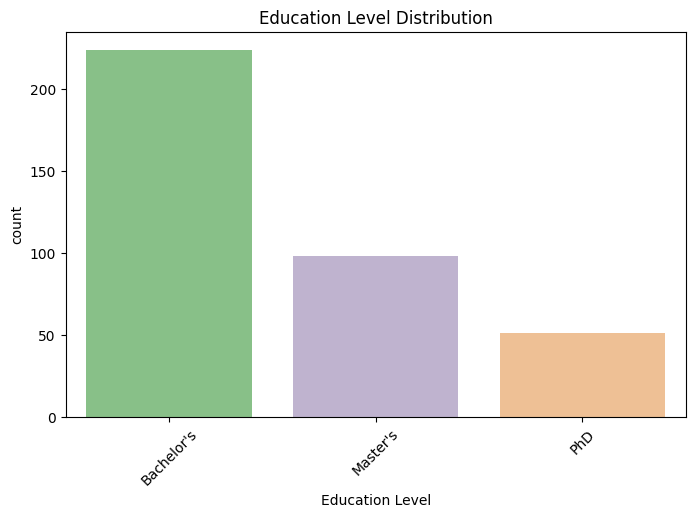

In [46]:
# Countplot for Education Level

plt.figure(figsize=(8, 5))
sns.countplot(x="Education Level", data=df, palette="Accent")
plt.xticks(rotation=45)
plt.title("Education Level Distribution")
plt.show()

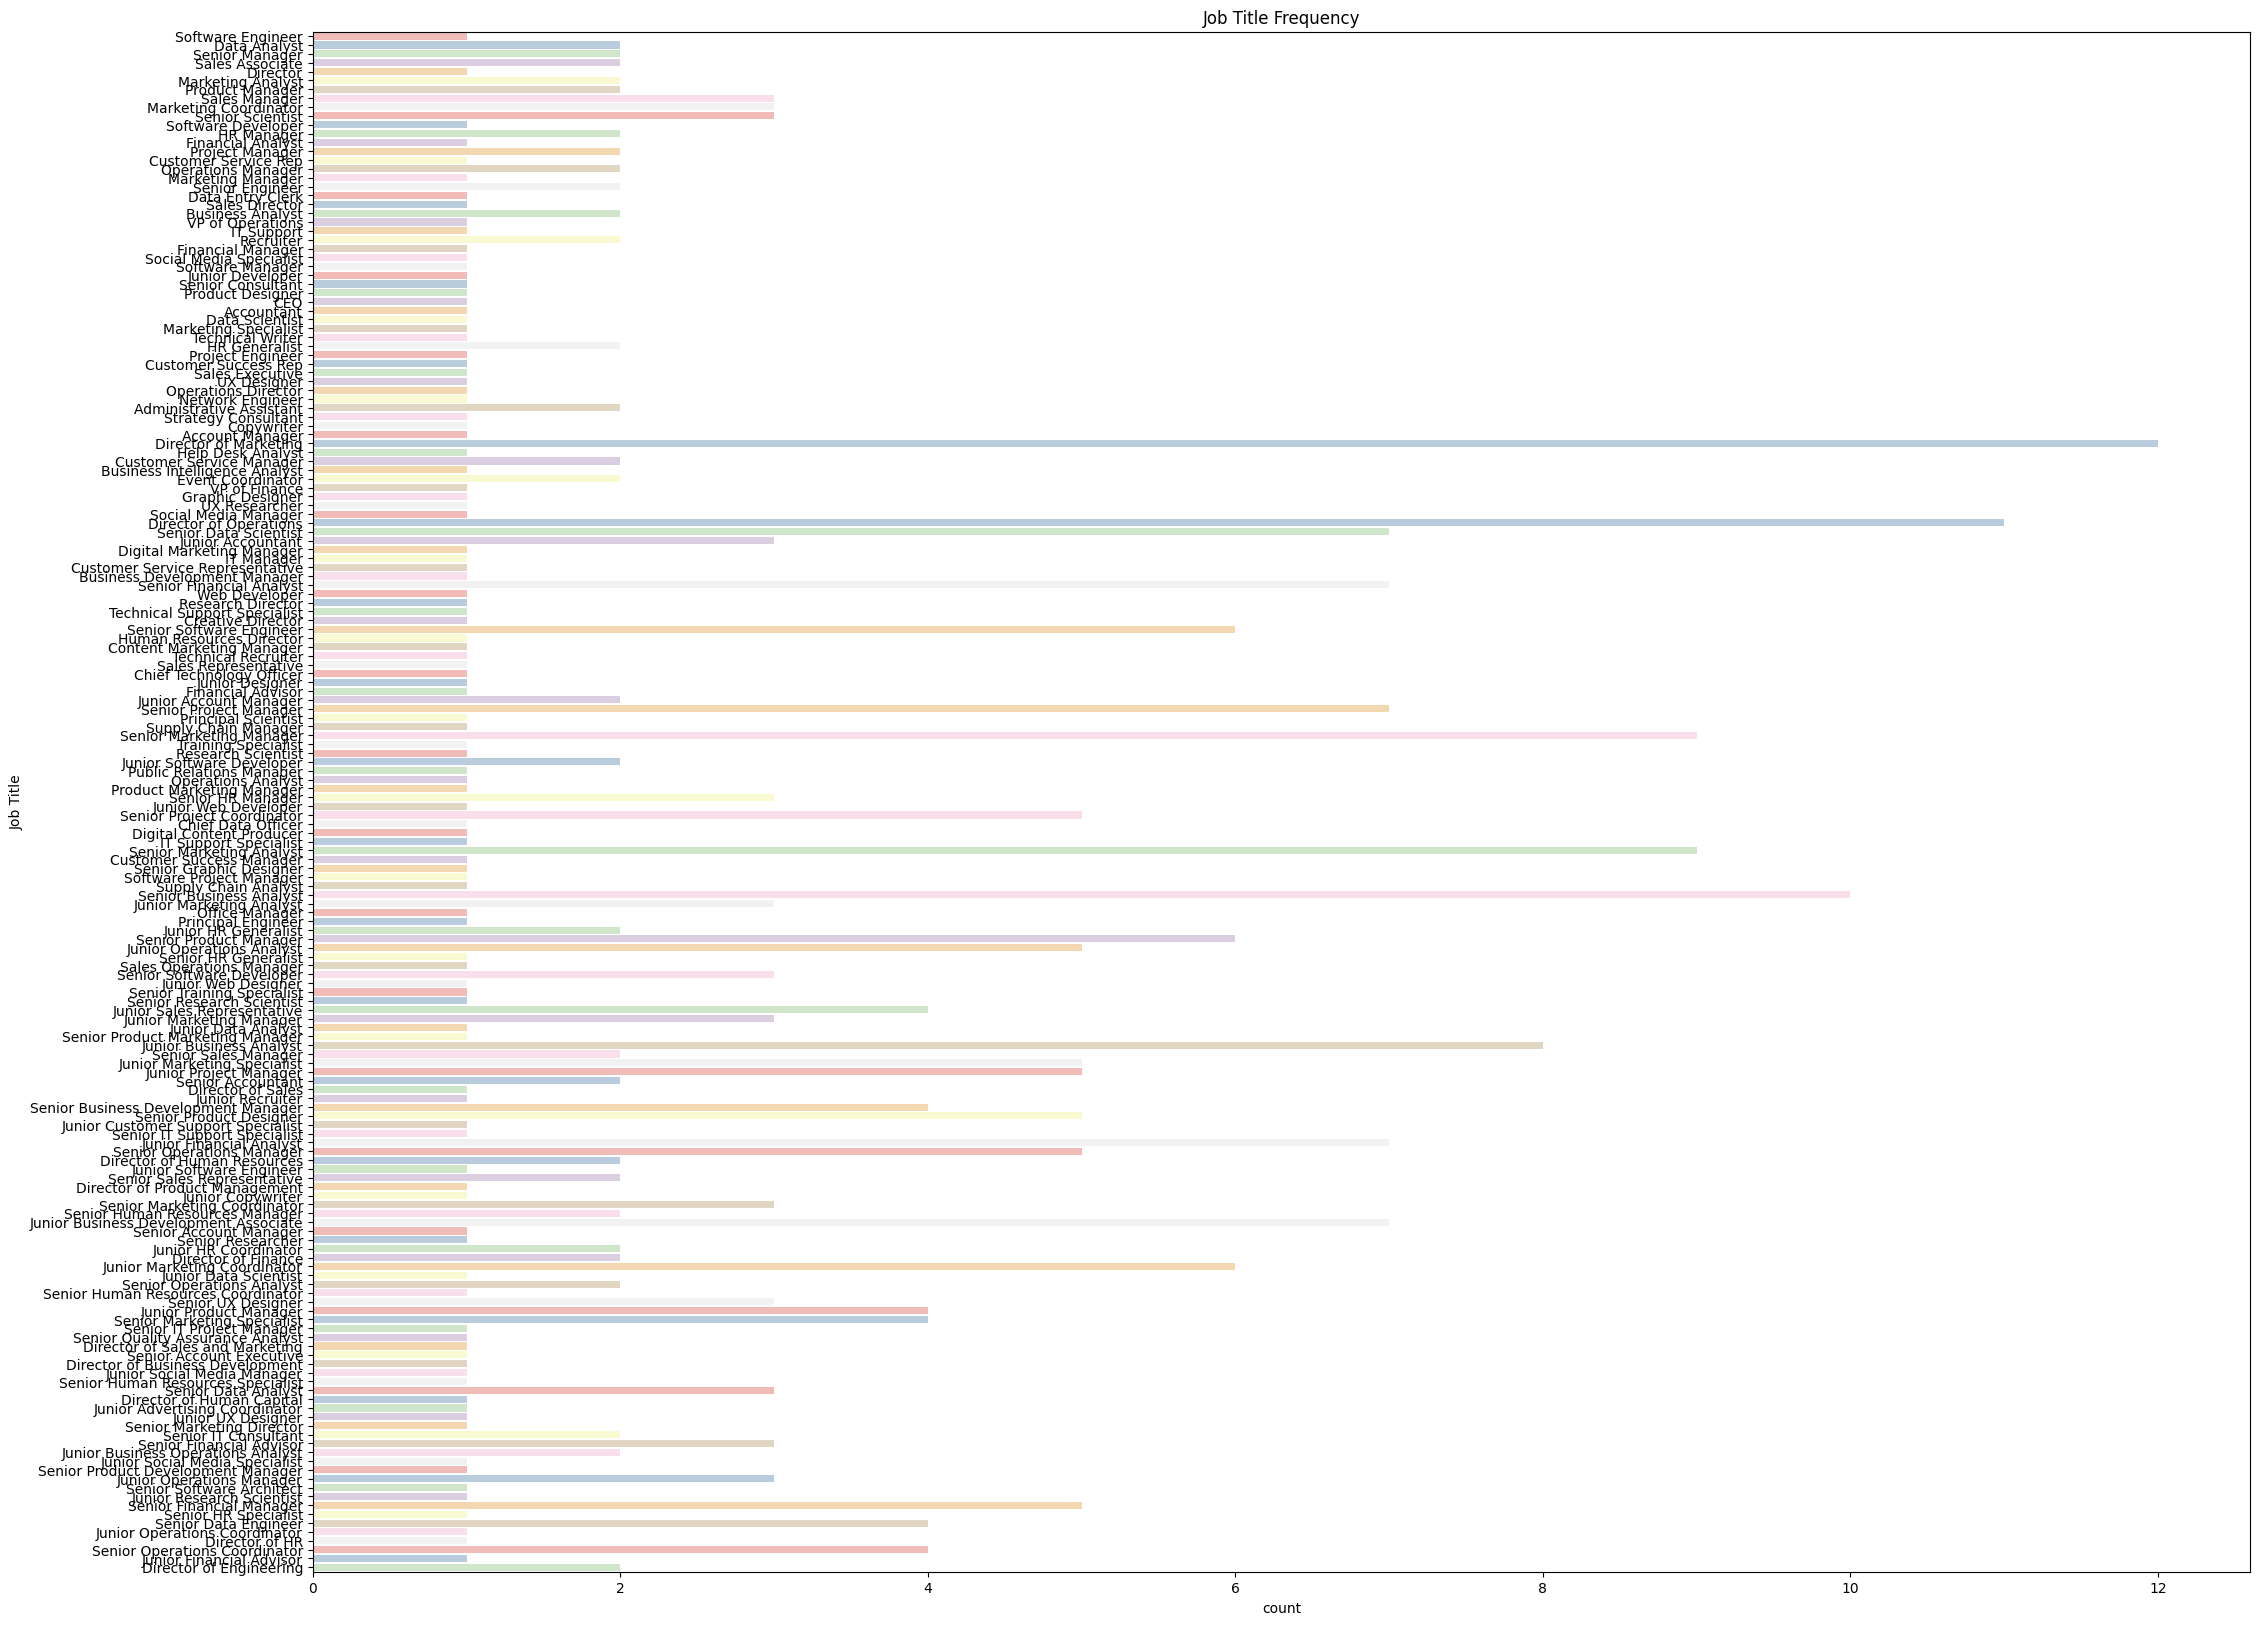

In [49]:
# Countplot for Job Titles

plt.figure(figsize=(25, 20))
sns.countplot(y="Job Title", data=df, palette="Pastel1")
plt.title("Job Title Frequency")
plt.show()

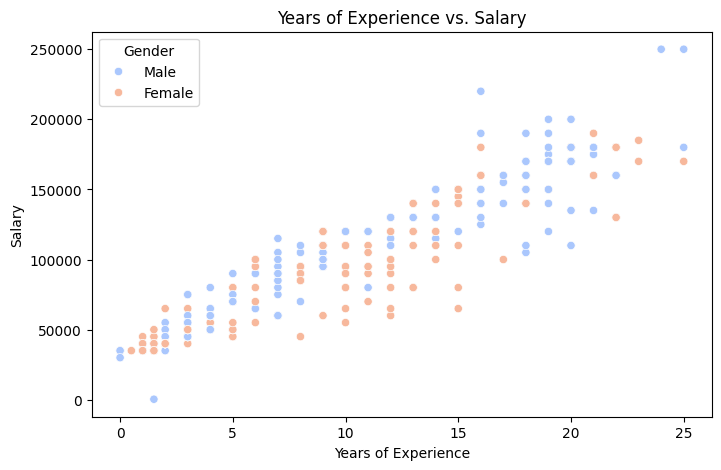

In [48]:
# Scatter Plot: Years of Experience vs Salary

plt.figure(figsize=(8, 5))
sns.scatterplot(x="Years of Experience", y="Salary", data=df, hue="Gender", palette="coolwarm")
plt.title("Years of Experience vs. Salary")
plt.show()

## Data Preprocessing

In [21]:
# Dropping NA Values

df = df.dropna()

In [22]:
# Dropping Duplicated Column

df = df.drop_duplicates()

In [23]:
df =  df.drop( ['Age', 'Gender','Job Title'], axis=1)

In [24]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])

In [25]:
X=df[['Education Level', 'Years of Experience']]
y=df[['Salary']]

In [26]:
# Train test and split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 9598)

## Model Building

In [27]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [38]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [30]:

model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.900712160050255,
 0.871938943862915,
 0.8870840150327057,
 0.876609773547744,
 0.8921021114051754,
 0.8651401846451633]

In [39]:
# R2 Score

LR_Model = Linear_reg.fit(X_train,y_train)
print("The R2 score of Linear Regression: ",r2_score(y_test,Linear_reg.predict(X_test)))

The R2 score of Linear Regression:  0.9006147906982908
